#### NOTE: Due to low computer memory, I was not able to balance out the target variable in the training data using SMOTE. Model performance is therefore quite poor, however the coding, logic, and most importantly the EDA are all still there

### Source of Data: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/julesbellosguardo/Downloads/Human_Resources_employee_turnover.csv')

In [13]:
df.shape

(1470, 35)

In [4]:
pd.set_option('display.max_columns', 100)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


<Axes: xlabel='Attrition', ylabel='count'>

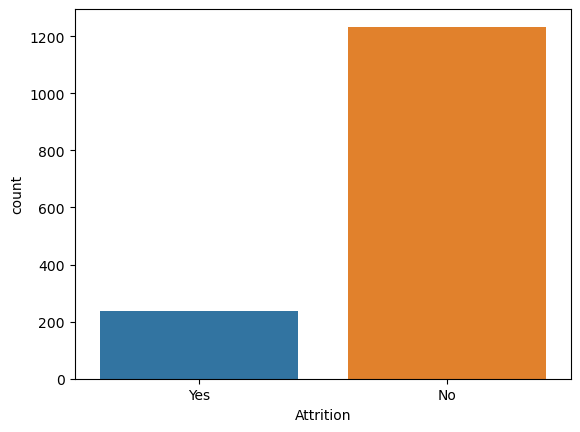

In [18]:
#Checking the balance of our target variable:
sns.countplot(data=df, x = 'Attrition', hue = 'Attrition')

In [8]:
#Label is highly unbalanced, we will deal with this later

In [3]:
#Converting Attrition to a binary numerical variable, 1 for yes, 0 for no:

df['Attrition'] = df['Attrition'].apply(lambda attrition: 1 if attrition == 'Yes' else 0)

In [22]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [21]:
total_left = len(df[df['Attrition'] == 1])
total_emps = len(df)

print(f'Percent of Employees who left: {round((total_left / total_emps) * 100, 2)}%')
print(f'Percent of Employees who stayed: { 100 - round((total_left / total_emps) * 100, 2)}%')

Percent of Employees who left: 16.12%
Percent of Employees who stayed: 83.88%


In [11]:
#Looking at missing value amounts:

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
emps_who_left = df[df['Attrition'] == 1]
emps_who_stayed = df[df['Attrition'] == 0]

In [13]:
emps_who_left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
emps_who_stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,3.639511,0.360408,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,25.000000,4.000000,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Text(0.5, 1.0, 'Feature Correlation with Attrition')

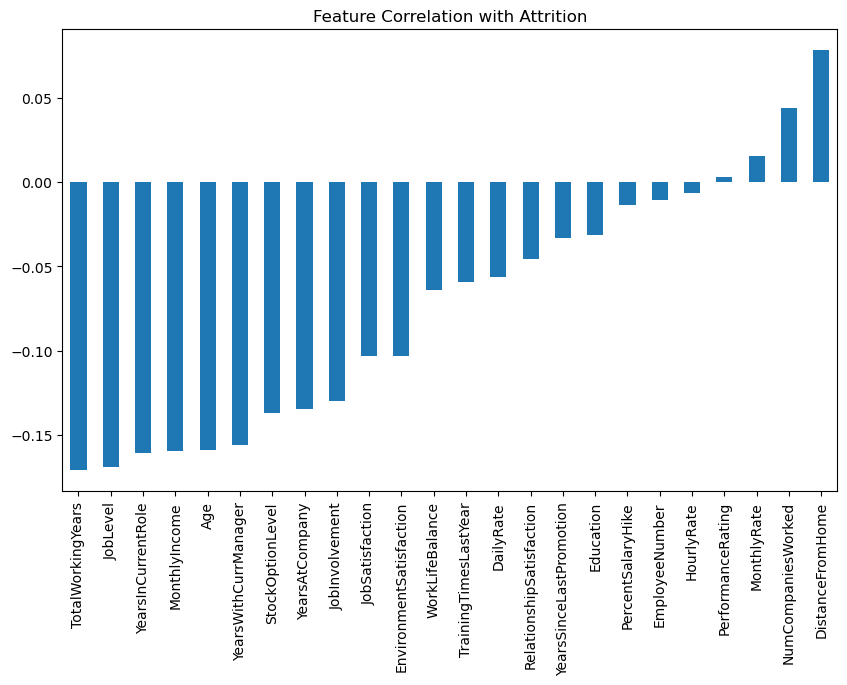

In [18]:
df.corr(numeric_only=True)['Attrition'].sort_values()[:-3].plot(kind='bar', figsize = (10,6))
plt.title('Feature Correlation with Attrition')

#### Looking at a few potentially useless columns:

<Axes: xlabel='Over18', ylabel='count'>

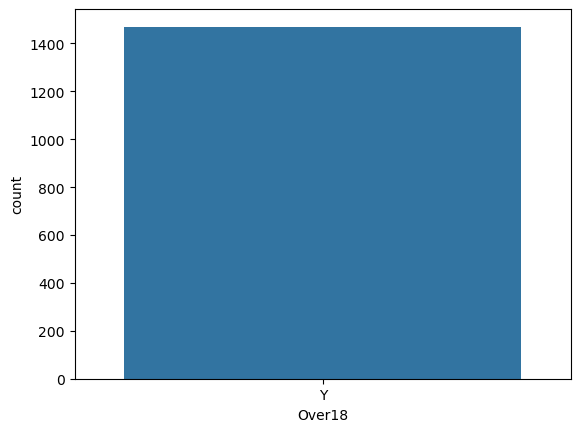

In [19]:
#Over 18 column:
sns.countplot(data = df, x = 'Over18')

In [4]:
#Since every employee is over18 years old, it does not add any information to our model, so we will drop the column:

df = df.drop('Over18', axis=1)

In [21]:
df.StandardHours.unique(), df.StandardHours.value_counts()

(array([80]),
 StandardHours
 80    1470
 Name: count, dtype: int64)

In [5]:
#Every employee has the same number of Standard Hours worked so we will drop this column as well:
df = df.drop('StandardHours', axis=1)

In [8]:
df.EmployeeCount.unique()

array([1])

In [6]:
#Same goes for this column, dropped

df = df.drop('EmployeeCount', axis=1)

In [7]:
#Employee number will also not be needed to train our model

df = df.drop('EmployeeNumber', axis=1)

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


# EDA:

<Axes: xlabel='Age', ylabel='Count'>

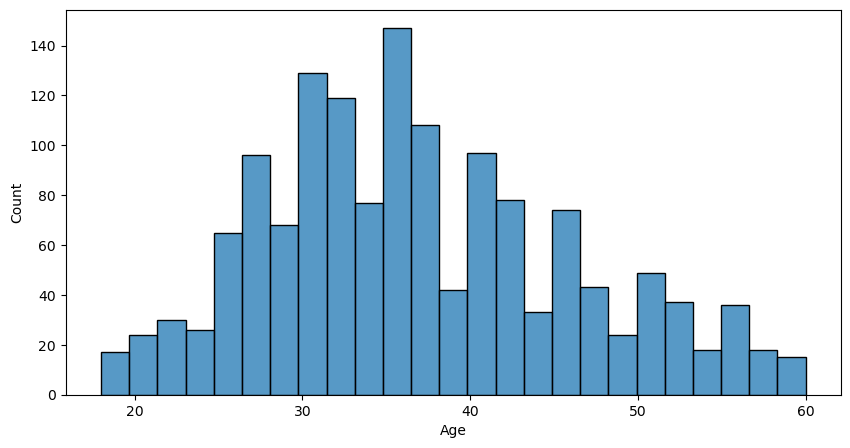

In [27]:
#Looking at distribution of employee ages
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'Age', bins = 25)

<Figure size 1200x600 with 0 Axes>

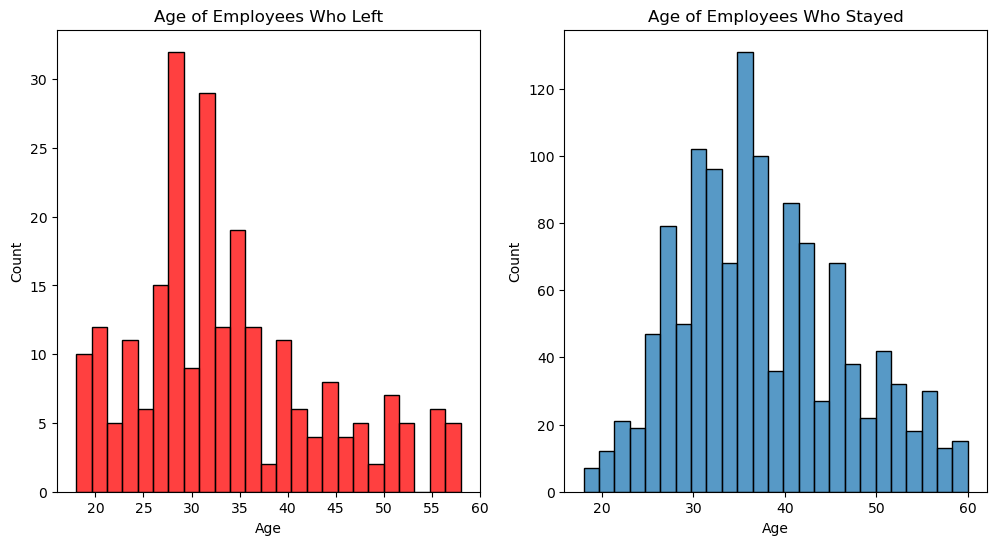

In [30]:
#Looking at age distribution of employees who stayed and left:
plt.figure(figsize=(12,6))
f, axes = plt.subplots(1,2, figsize=(12,6))

sns.histplot(data = df[df['Attrition'] == 1], x = 'Age', ax = axes[0], bins = 25, color = 'red') #Those who left
axes[0].title.set_text('Age of Employees Who Left')

sns.histplot(data = df[df['Attrition'] == 0], x = 'Age', ax = axes[1], bins = 25) #Those who stayed
axes[1].title.set_text('Age of Employees Who Stayed')


Though there are many more data points for those who didn't leave, the age of employees who left seems to be skewed more towards lower ages.


In [39]:
#Getting mean value for each:
print(f"Mean age of employees who left: {round(df[df['Attrition'] == 1]['Age'].mean(), 2)}")
print(f"Mean age of employees who stayed: {round(df[df['Attrition'] == 0]['Age'].mean(), 2)}")



Mean age of employees who left: 33.61
Mean age of employees who stayed: 37.56


<Axes: xlabel='Age', ylabel='MonthlyIncome'>

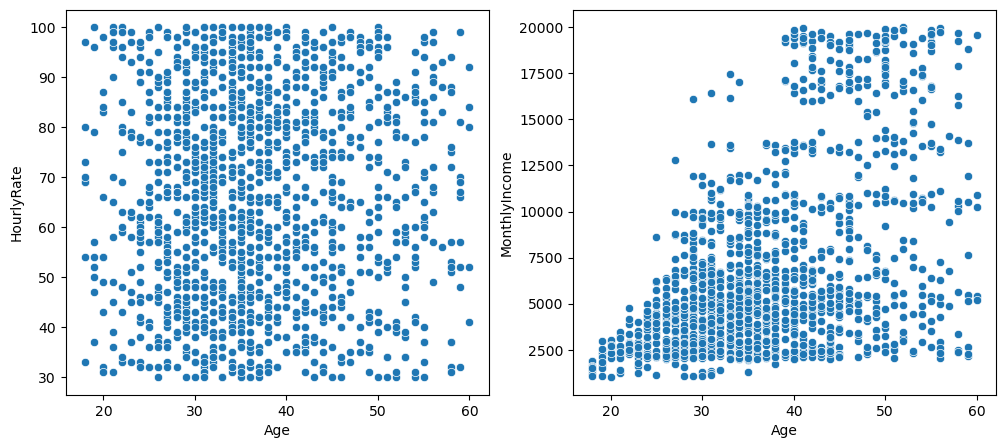

In [43]:

f, axes = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(data = df, x = 'Age', y = 'HourlyRate', ax = axes[0])
sns.scatterplot(data = df, x = 'Age', y = 'MonthlyIncome', ax = axes[1])

No apparent correlation between hourly rate and age, Monthly income seems to increase in general with age, 
however this may only be for certain positions where growth opportunities are more present

<Axes: xlabel='Department', ylabel='MonthlyIncome'>

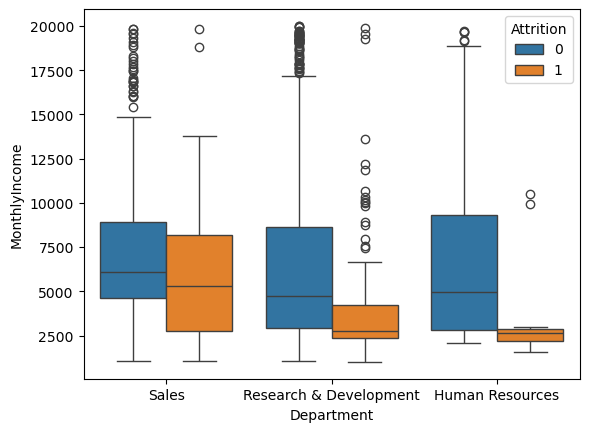

In [45]:
sns.boxplot(data = df, x = 'Department', y = 'MonthlyIncome', hue = 'Attrition')

#### We can clearly see that people who left the company had lower monthly salaries on average compared to people in the same department.

Exploring Further:

In [66]:
#Amount of people that left per department:
print(f"Sales: {len(df[(df['Department'] == 'Sales') & (df['Attrition'] == 1)])}")
print(f"R&D: {len(df[(df['Department'] == 'Research & Development') & (df['Attrition'] == 1)])}")
print(f"HR: {len(df[(df['Department'] == 'Human Resources') & (df['Attrition'] == 1)])}")

Sales: 92
R&D: 133
HR: 12


In [69]:
#Looking at features' correlation to monthly income
df.corr(numeric_only=True)['MonthlyIncome'].sort_values()

Attrition                  -0.159840
PercentSalaryHike          -0.027269
TrainingTimesLastYear      -0.021736
PerformanceRating          -0.017120
DistanceFromHome           -0.017014
HourlyRate                 -0.015794
JobInvolvement             -0.015271
JobSatisfaction            -0.007157
EnvironmentSatisfaction    -0.006259
StockOptionLevel            0.005408
DailyRate                   0.007707
RelationshipSatisfaction    0.025873
WorkLifeBalance             0.030683
MonthlyRate                 0.034814
Education                   0.094961
NumCompaniesWorked          0.149515
YearsWithCurrManager        0.344079
YearsSinceLastPromotion     0.344978
YearsInCurrentRole          0.363818
Age                         0.497855
YearsAtCompany              0.514285
TotalWorkingYears           0.772893
JobLevel                    0.950300
MonthlyIncome               1.000000
Name: MonthlyIncome, dtype: float64

We see here that Monthly income is highly correlated to factors relating to time such as TotalWorkingYears, YearsAtCompany, Age, and JobLevel which usuallly increases with time. This ties to the fact that the mean age of employees who didn't leave is higher.

<Axes: xlabel='JobRole', ylabel='count'>

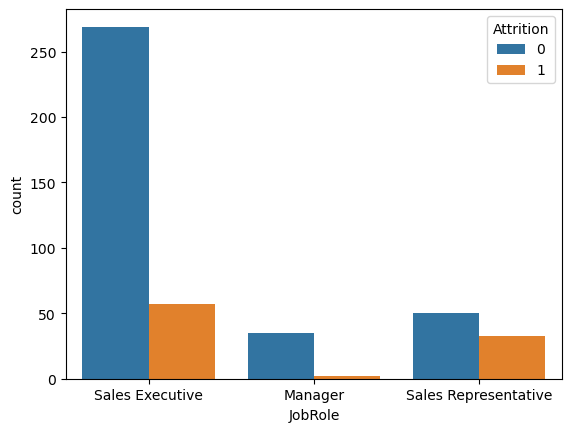

In [60]:
sns.countplot(data = df[(df['Department'] == 'Sales')], x = 'JobRole', hue = 'Attrition')


Out of the sales department, the roles where the highest rate of people left is clearly sales rep. The graph below shows us that sales reps also have the lowest average monthly incomes within the sales department, which could help explain their elevated attrition rate compared to the rest of the sales department

<Axes: xlabel='JobRole', ylabel='MonthlyIncome'>

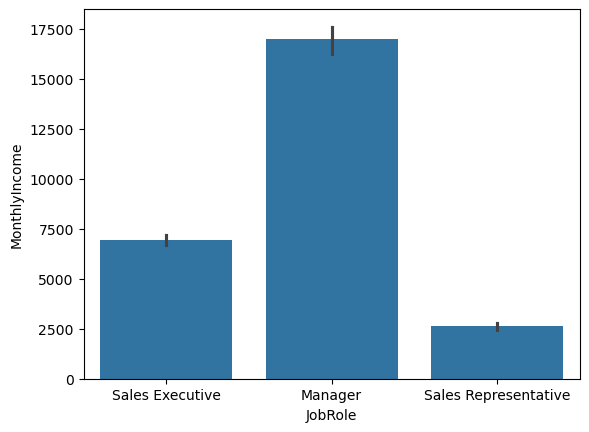

In [83]:
#Mean monthly income among each job role in Sales:
sales_df = df[df['Department'] == 'Sales']
sns.barplot(data = sales_df, x = 'JobRole', y = 'MonthlyIncome', estimator='mean')

In [87]:
#Taking another look at our columns:
pd.set_option('display.max_columns', 40)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


<Axes: xlabel='BusinessTravel', ylabel='count'>

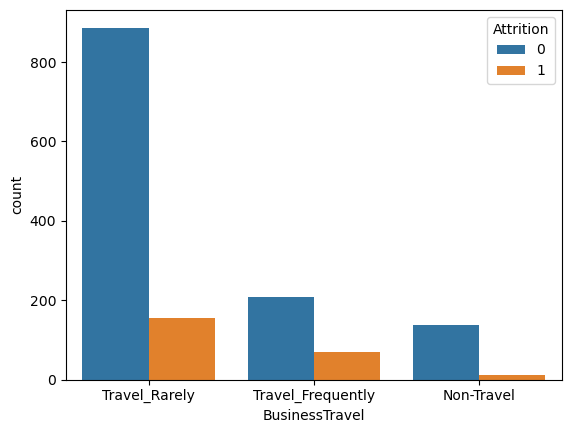

In [30]:
sns.countplot(data = df, x = 'BusinessTravel', hue = 'Attrition')

In [43]:
total_travel_rarely = len((df[df['BusinessTravel'] ==  'Travel_Rarely']))
travel_rarely_and_left = len(df[(df['Attrition'] == 1) & (df['BusinessTravel'] == 'Travel_Rarely')])

print(f'Percent of people who travel rarely for work and left: {round((travel_rarely_and_left / total_travel_rarely) * 100, 2)}')
print()

total_travel_frequently = len((df[df['BusinessTravel'] ==  'Travel_Frequently']))
travel_frequently_and_left = len(df[(df['Attrition'] == 1) & (df['BusinessTravel'] == 'Travel_Frequently')])
print(f'Percent of people who travel frequently for work and left: {round((travel_frequently_and_left / total_travel_frequently) * 100, 2)}')
print()

total_no_travel = len((df[df['BusinessTravel'] ==  'Non-Travel']))
no_travel_and_left = len(df[(df['Attrition'] == 1) & (df['BusinessTravel'] == 'Non-Travel')])
print(f'Percent of people who do not travel for work and left: {round((no_travel_and_left / total_no_travel) * 100, 2)}')
print()

Percent of people who travel rarely for work and left: 14.96

Percent of people who travel frequently for work and left: 24.91

Percent of people who do not travel for work and left: 8.0



This tells us that the more frequently people travel for work, the more likely they are to leave

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

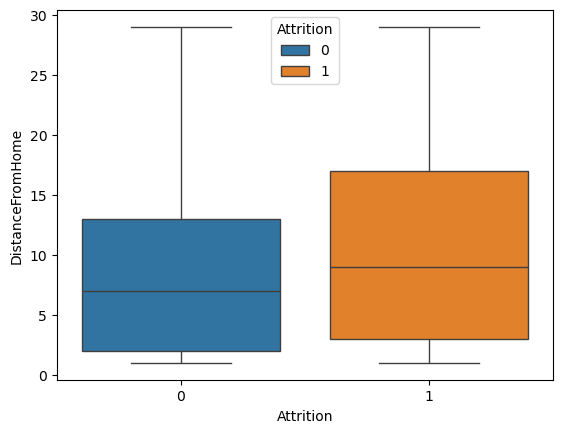

In [46]:
sns.boxplot(data = df, x = 'Attrition', y = 'DistanceFromHome', hue = 'Attrition')

People who left lived further from work on average (this was rather expected)

<Axes: xlabel='Education', ylabel='MonthlyRate'>

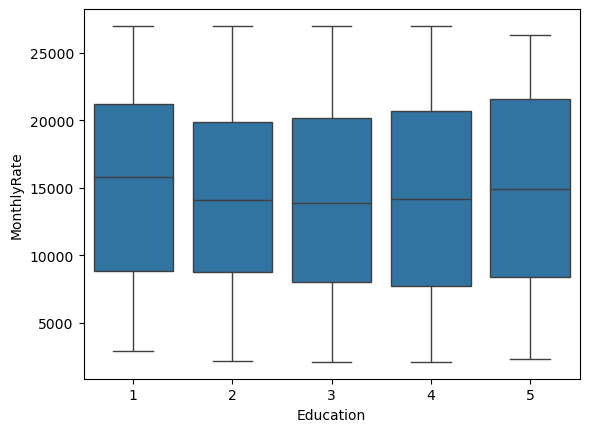

In [10]:
sns.boxplot(data = df, x = 'Education', y = 'MonthlyRate')

Education doesn't seem to have a big impact on employee salary

<Axes: xlabel='MaritalStatus', ylabel='count'>

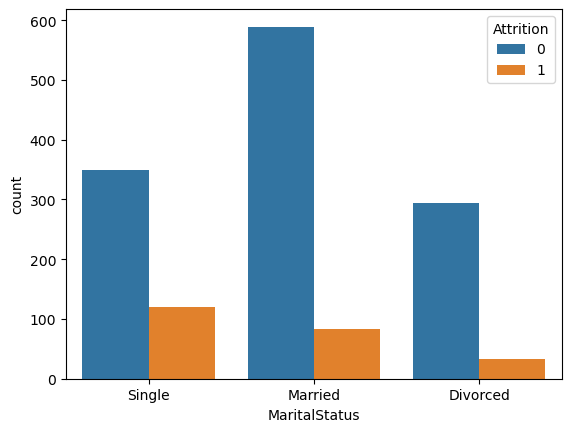

In [53]:
sns.countplot(data = df, x = 'MaritalStatus', hue = 'Attrition')

Attrition rate highest for single people (precise rates calculated below) which makes sense, as once people start a family (or just get married) they are less likely to quit due to financial obligations, or they're just living a more stable lifestyle

In [90]:
total_single = len((df[df['MaritalStatus'] ==  'Single']))
single_and_left = len(df[(df['Attrition'] == 1) & (df['MaritalStatus'] == 'Single')])

print(f'Percent of single people who left: {round((single_and_left / total_single) * 100, 2)}%')
print()

total_married = len((df[df['MaritalStatus'] ==  'Married']))
married_and_left = len(df[(df['Attrition'] == 1) & (df['MaritalStatus'] == 'Married')])
print(f'Percent of married people who left: {round((married_and_left / total_married) * 100, 2)}%')
print()

total_divorced = len((df[df['MaritalStatus'] ==  'Divorced']))
divorced_and_left = len(df[(df['Attrition'] == 1) & (df['MaritalStatus'] == 'Divorced')])
print(f'Percent of divorced people who left: {round((divorced_and_left / total_divorced) * 100, 2)}%')
print()

Percent of single people who left: 25.53%

Percent of married people who left: 12.48%

Percent of divorced people who left: 10.09%



In [56]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


<Axes: xlabel='Gender', ylabel='count'>

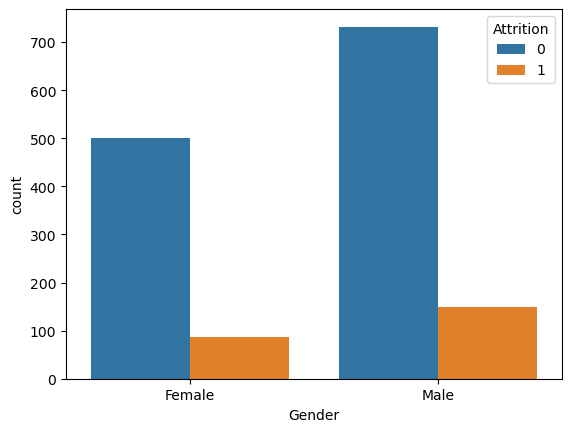

In [91]:
sns.countplot(data = df, x = 'Gender', hue = 'Attrition')

<Axes: xlabel='YearsAtCompany', ylabel='count'>

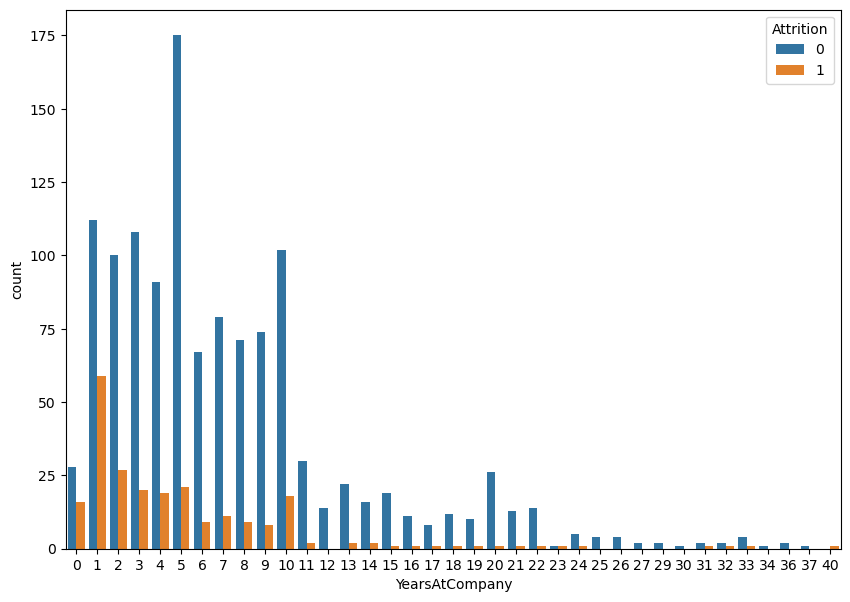

In [98]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'YearsAtCompany', hue = 'Attrition')

Normal for higher attrition rates to correspond to lower number of years spent at the company. It is safe to assume that attritions after a certain amount of time at the company (20+ years) are due to retirement 

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

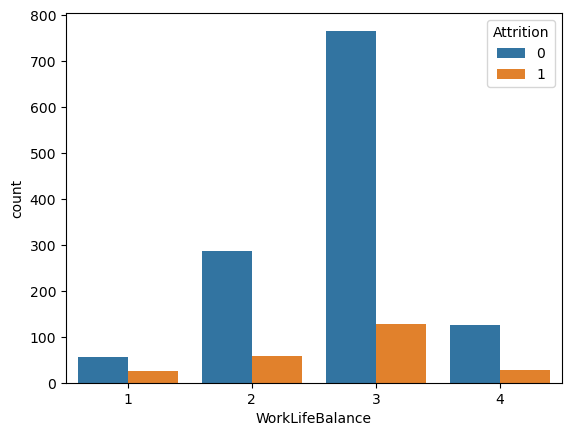

In [69]:
sns.countplot(data = df, x = 'WorkLifeBalance', hue = 'Attrition')

Attrition rate clearly highest for those with minimal work-life balance. May want to consider reversing order of values when building model to predict attrition

<Axes: xlabel='StockOptionLevel', ylabel='count'>

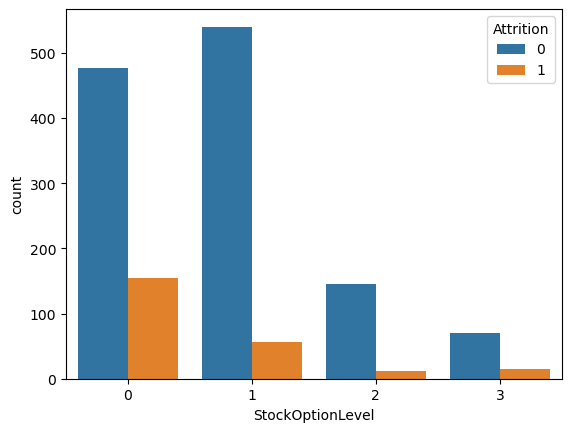

In [76]:
sns.countplot(data = df, x = 'StockOptionLevel', hue = 'Attrition')

Attrition rates lower in those that have a higher stock option level, which also makes perfect sense

<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

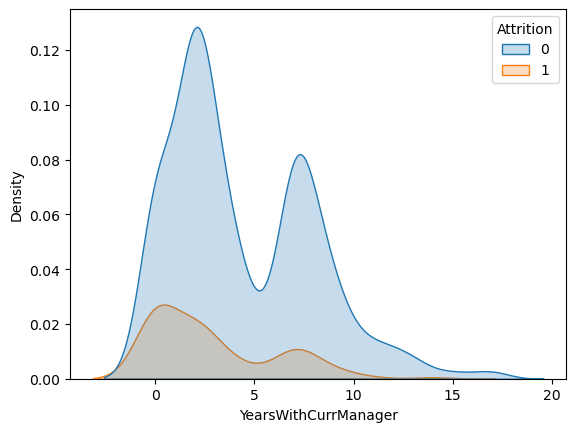

In [92]:
sns.kdeplot(data = df, x = 'YearsWithCurrManager', hue = 'Attrition', fill = True)

Years with manager has more or less the same distribution regardless of Attrition

In [101]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

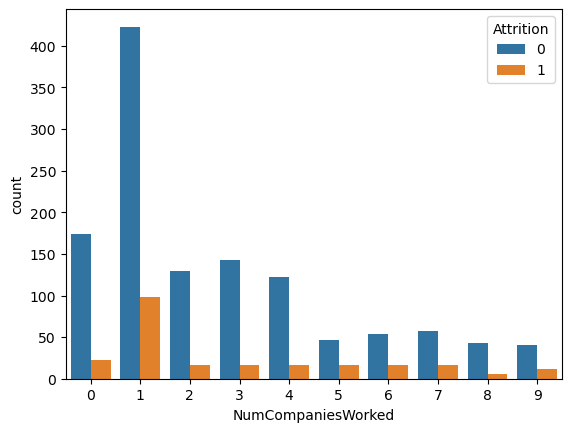

In [103]:
sns.countplot(data = df, x = 'NumCompaniesWorked', hue = 'Attrition')

/var/folders/18/_q0z_1k55hb814fgjk4yb8pc0000gn/T/ipykernel_30299/2616429765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = att_rate_num_comp, x = 'NumCompaniesWorked', y = 'Attrition', palette = 'plasma')


Text(0.5, 1.0, 'Attrition Rate by Number of Companies Worked at')

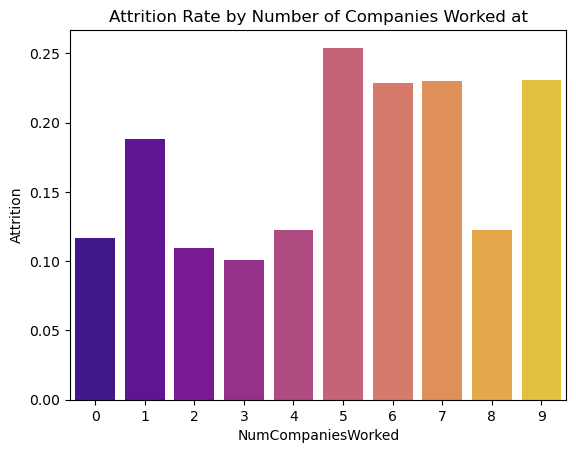

In [134]:
att_rate_num_comp = df.groupby(by = 'NumCompaniesWorked')['Attrition'].mean().reset_index()
sns.barplot(data = att_rate_num_comp, x = 'NumCompaniesWorked', y = 'Attrition', palette = 'plasma')
plt.title('Attrition Rate by Number of Companies Worked at')

Attrition rates on average are higher after about 5 different companies worked at

In [123]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


<Axes: xlabel='DistanceFromHome', ylabel='count'>

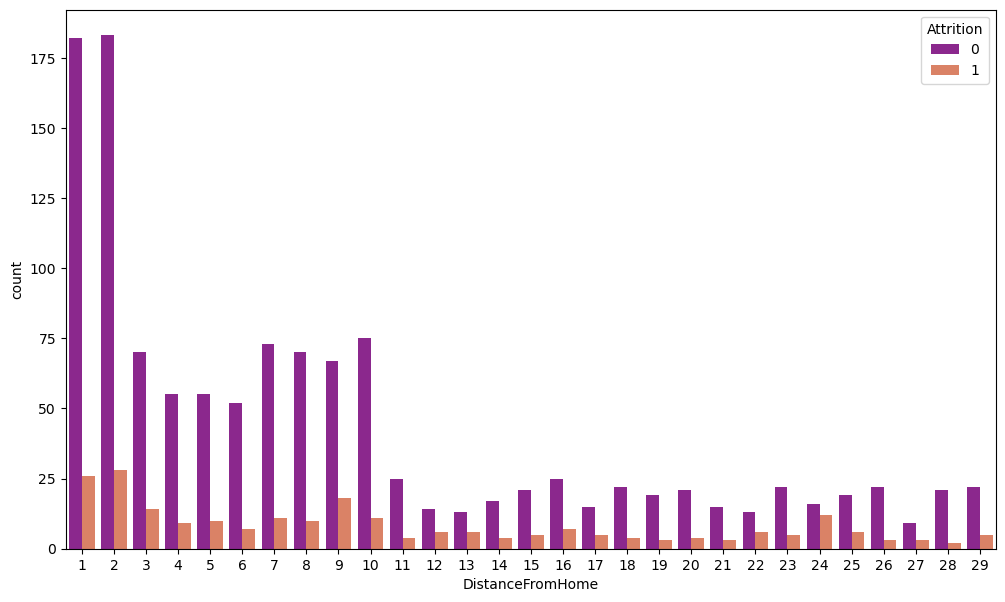

In [130]:
plt.figure(figsize=(12,7))
sns.countplot(data = df, x = 'DistanceFromHome', hue = 'Attrition', palette = 'plasma')

/var/folders/18/_q0z_1k55hb814fgjk4yb8pc0000gn/T/ipykernel_30299/3157481334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = dist_from_home_attn, x = 'DistanceFromHome', y = 'Attrition', palette = 'plasma')


Text(0.5, 1.0, 'Attrition Rate by Distance from Home')

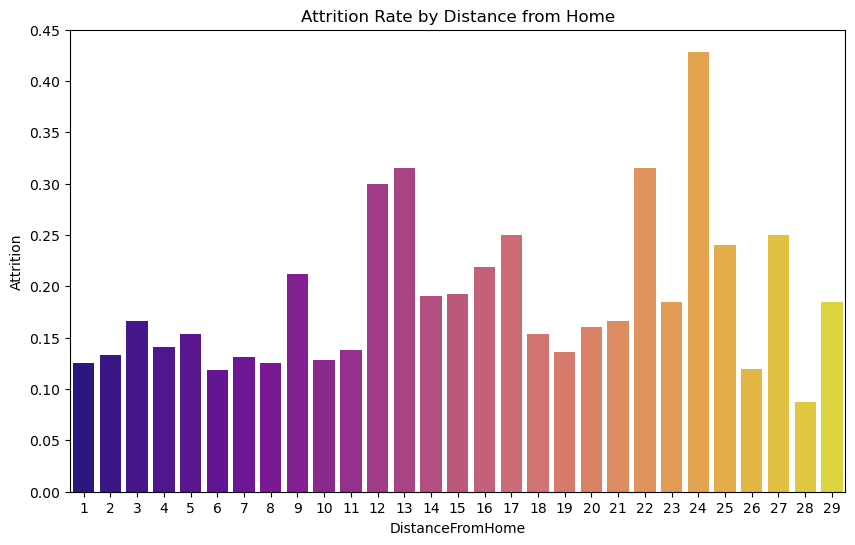

In [138]:
#Attrition rate by distance from home unit:
dist_from_home_attn = df.groupby(by='DistanceFromHome')['Attrition'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = dist_from_home_attn, x = 'DistanceFromHome', y = 'Attrition', palette = 'plasma')
plt.title('Attrition Rate by Distance from Home')

# Preprocessing:

In [8]:
df.select_dtypes(include = ['object']).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [9]:
categorical_features_to_convert = df[df.select_dtypes(include = ['object']).columns]

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
encoder = OneHotEncoder()
categorical_features_to_convert = encoder.fit_transform(X = categorical_features_to_convert).toarray()

In [12]:
converted_features = pd.DataFrame(categorical_features_to_convert)

In [13]:
converted_features.columns = encoder.get_feature_names_out()

In [17]:
converted_features

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
df = pd.concat([df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'], axis=1), converted_features], axis=1)

In [26]:
df.shape

(1470, 52)

In [15]:
pd.set_option('display.max_columns', 60)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [15]:
X = df.drop('Attrition', axis = 1)
y = df['Attrition']

In [1]:
import imblearn
print(imblearn.__version__)

0.11.0


## Splitting and Scaling Data:

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [18]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Balancing Target Variable:
#from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
print()
print(y_train_smote.value_counts())

## Note: SMOTE is killing the kernel (computer has very low memory) so we will continue without using it at the (great) expense of model performance. Not ideal but okay since this is just a personal project

In [30]:
scaler = MinMaxScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [32]:
X_test = scaler.transform(X_test)

In [33]:
X_test.shape

(368, 51)

### We will now try a few different models (Logistic Regression, SKL Random Forest,  Artificial Neural Network) to make predictions and see which ones perform best:

### Logistic Regression:

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
log_reg_predictions = log_reg_model.predict(X_test)

In [32]:
print(confusion_matrix(y_test, log_reg_predictions))

[[301   5]
 [ 36  26]]


<Axes: >

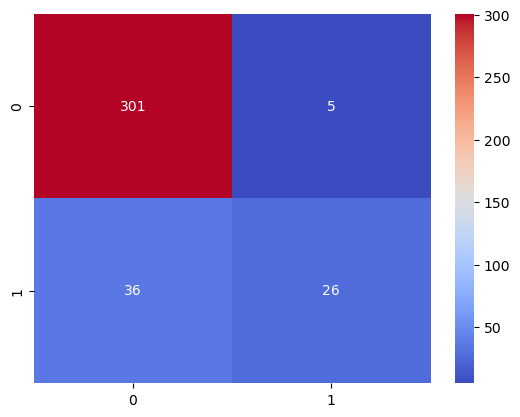

In [44]:
sns.heatmap(confusion_matrix(y_test, log_reg_predictions), cmap='coolwarm', annot=True, fmt='g')

In [34]:
print(classification_report(y_test, log_reg_predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       306
           1       0.84      0.42      0.56        62

    accuracy                           0.89       368
   macro avg       0.87      0.70      0.75       368
weighted avg       0.88      0.89      0.87       368



Note: Performance, especially where recall is concerned, would drastically improve if something like SMOTE were to be used

### SKL Random Forest:

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
sk_rand_forest = RandomForestClassifier()
sk_rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
sk_rand_forest_preds = sk_rand_forest.predict(X_test)

<Axes: >

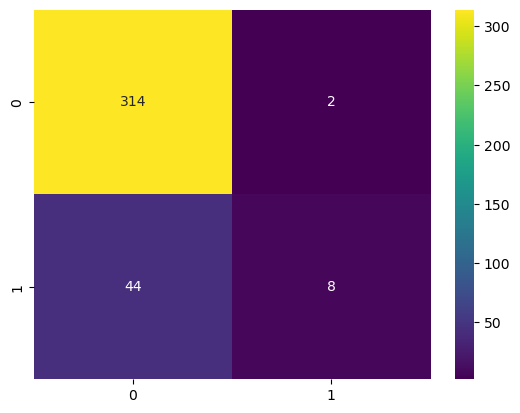

In [26]:
sns.heatmap(confusion_matrix(y_test, sk_rand_forest_preds), cmap = 'viridis', annot = True, fmt='g')

In [27]:
print(classification_report(y_test, sk_rand_forest_preds))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       316
           1       0.80      0.15      0.26        52

    accuracy                           0.88       368
   macro avg       0.84      0.57      0.59       368
weighted avg       0.87      0.88      0.84       368



Pretty poor performance when considering how low the recall is for Attrition = 1 
(again: imbalanced target variable)

In [36]:
#Doing a Grid Search to see if we can improve performance:

In [28]:
param_grid = {'n_estimators': [10,15,25,50,100,150,200,250,300,350],
             'max_depth': [None, 3,5,7,9,11,13],
             'min_samples_split': [2, 5, 10],
             'bootstrap': [True, False]}

In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [30]:
random_search_sk_forest = RandomizedSearchCV(estimator=sk_rand_forest, param_distributions=param_grid, cv = 5,
                                            n_iter=100, verbose=1)


## The following code runs the search however my computer takes quite a while so I won't run the code, but this would potentially give better RF parameters

In [42]:
#random_search_sk_forest.fit(X_train, y_train)

### Artificial Neural Network:

In [34]:
X_train.shape

(1102, 51)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [40]:
ann_model = Sequential()

ann_model.add(Dense(units = 51, activation='relu')) #Units 51 to match number of features in X_train

ann_model.add(Dense(units = 25, activation='relu'))

ann_model.add(Dense(units = 1, activation='sigmoid'))

ann_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [41]:
ann_model.fit(X_train, y_train, epochs = 150, validation_data=(X_test, y_test), batch_size = 32)

Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6837 - loss: 0.5904 - val_accuracy: 0.8397 - val_loss: 0.4144
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8385 - loss: 0.4040 - val_accuracy: 0.8397 - val_loss: 0.3900
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8336 - loss: 0.3935 - val_accuracy: 0.8397 - val_loss: 0.3683
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8468 - loss: 0.3556 - val_accuracy: 0.8505 - val_loss: 0.3536
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8434 - loss: 0.3688 - val_accuracy: 0.8587 - val_loss: 0.3442
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8556 - loss: 0.3332 - val_accuracy: 0.8723 - val_loss: 0.3344
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8741 - loss: 0.2960 - val_accuracy: 0.8668 - val_loss: 0.3289
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8638 - loss: 0.3275 - val_accuracy: 0.8696 - v

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.8587 - val_loss: 0.7408
Epoch 102/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.8587 - val_loss: 0.7512
Epoch 103/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.8451 - val_loss: 0.7499
Epoch 104/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.8587 - val_loss: 0.7691
Epoch 105/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.8560 - val_loss: 0.7685
Epoch 106/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.8614 - val_loss: 0.7732
Epoch 107/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.8478 - val_loss: 0.7798
Epoch 108/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.8560 -

In [42]:
metrics = pd.DataFrame(ann_model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.788566,0.504712,0.839674,0.414356
1,0.838476,0.400776,0.839674,0.389983
2,0.839383,0.379411,0.839674,0.368259
3,0.842105,0.360625,0.850543,0.353586
4,0.850272,0.347375,0.858696,0.344189


<Axes: >

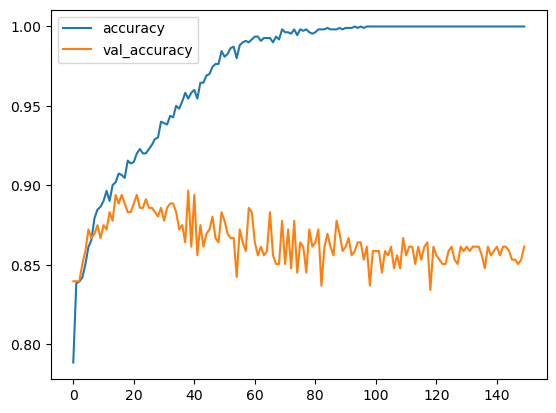

In [43]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

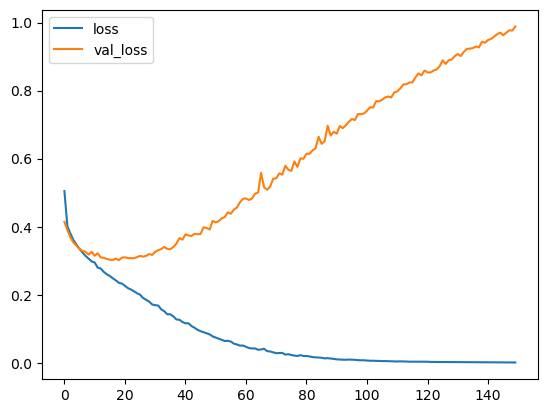

In [44]:
metrics[['loss', 'val_loss']].plot()

Validation loss starts increasing pretty quickly so we have definitely overfitted our model, not as many epochs are needed. Adding dropout layers as well as early stopping will also help prevent overfitting

In [45]:
ann_model = Sequential()

ann_model.add(Dense(units = 51, activation='relu')) #Units 51 to match number of features in X_train
ann_model.add(Dropout(0.3))
ann_model.add(Dense(units = 25, activation='relu'))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(units = 1, activation='sigmoid'))

ann_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(patience=4, monitor = 'val_accuracy')

In [48]:
ann_model.fit(X_train, y_train, epochs = 80, validation_data=(X_test, y_test), batch_size = 32, callbacks=[early_stop])

Epoch 1/80
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8296 - loss: 0.4666 - val_accuracy: 0.8397 - val_loss: 0.4019
Epoch 2/80
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8531 - loss: 0.4028 - val_accuracy: 0.8397 - val_loss: 0.3848
Epoch 3/80
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8431 - loss: 0.3925 - val_accuracy: 0.8397 - val_loss: 0.3677
Epoch 4/80
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8447 - loss: 0.3804 - val_accuracy: 0.8424 - val_loss: 0.3540
Epoch 5/80
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8564 - loss: 0.3516 - val_accuracy: 0.8505 - val_loss: 0.3484
Epoch 6/80
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8496 - loss: 0.3604 - val_accuracy: 0.8505 - val_loss: 0.3401
Epoch 7/80
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8414 - loss: 0.3805 - val_accuracy: 0.8505 - val_loss: 0.3323
Epoch 8/80
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8708 - loss: 0.3283 - val_accuracy: 0.8641 - val_loss:

In [49]:
metrics = pd.DataFrame(ann_model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.834846,0.448195,0.839674,0.401870
1,0.837568,0.412494,0.839674,0.384783
2,0.841198,0.396697,0.839674,0.367736
3,0.846642,0.391659,0.842391,0.354012
4,0.843920,0.374590,0.850543,0.348361


<Axes: >

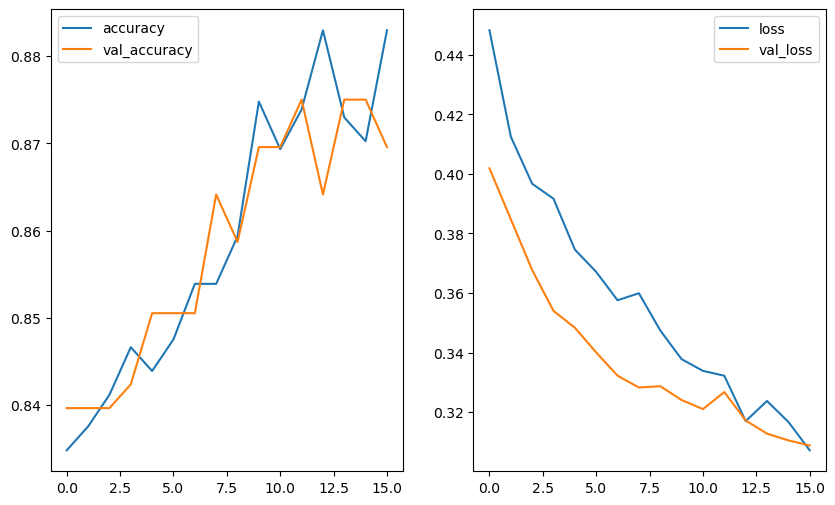

In [50]:
f, axes = plt.subplots(1,2, figsize = (10,6))
metrics[['accuracy', 'val_accuracy']].plot(ax = axes[0])
metrics[['loss', 'val_loss']].plot(ax = axes[1])

In [51]:
predictions_ann = ann_model.predict(x = X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [60]:
bin_pred_ann = (predictions_ann >= 0.5).astype(int)

In [61]:
bin_pred_ann

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [62]:
print(classification_report(y_test, bin_pred_ann))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       309
           1       0.70      0.32      0.44        59

    accuracy                           0.87       368
   macro avg       0.79      0.65      0.68       368
weighted avg       0.85      0.87      0.85       368



Again, class imbalance and inability to use smote amongst other tools to balance leads to a poor recall and precision

## Optimizing Network Structure using Keras Tuner: The following is the code for it but the model will not be tuned due to long run times

In [44]:
from kerastuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [51]:
def build_model(hp): #put hp argument later:
    ann_model = Sequential()

    ann_model.add(Dense(units = hp.Int('input_units', min_value = 50, max_value = 250, step = 50), activation='relu')) #Units 51 to match number of features in X_train
    ann_model.add(Dropout(hp.Float('input_layer_dropout_rate', min_value = 0.1, max_value = 0.7, step = 0.1)))

    for i in range(hp.Int('num_layers', 1, 3)):
        ann_model.add(Dense(units = hp.Int(f'layer_{i}_units', min_value = 50, max_value = 250, step = 50), activation='relu'))
        ann_model.add(Dropout(0.25))

    
    ann_model.add(Dense(units = 1, activation='sigmoid'))

    
    ann_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [48]:
tuner = RandomSearch(hypermodel= build_model, objective='val_accuracy', max_trials=25)

# Run this to do search 


In [52]:
#tuner.search(x = X_train, y = y_train, epochs = 40, validation_data = (X_test, y_train))

## Overall, logistic regression seemed to perform best, especially when considering efficiency of the model